<a href="https://colab.research.google.com/github/CosmoStat/ShearDataClub/blob/main/KiDS1000/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data exploration of the KiDS-1000 gold shear catalog

In this notebook, we are using the data provided here: http://kids.strw.leidenuniv.nl/DR4/KiDS-1000_shearcatalogue.php

In [1]:
# Retrieve the data from fast storage on Google cloud, takes 2mins
!wget https://storage.googleapis.com/ahw2019/KiDS_DR4.1_ugriZYJHKs_SOM_gold_WL_cat.fits

--2021-06-24 08:02:00--  https://storage.googleapis.com/ahw2019/KiDS_DR4.1_ugriZYJHKs_SOM_gold_WL_cat.fits
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.128, 173.194.69.128, 173.194.79.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17712469440 (16G) [application/octet-stream]
Saving to: ‘KiDS_DR4.1_ugriZYJHKs_SOM_gold_WL_cat.fits’

KiDS_DR4.1_ugriZYJH 100%[===================>]  16.50G  16.2MB/s    in 6m 51s  

2021-06-24 08:08:52 (41.1 MB/s) - ‘KiDS_DR4.1_ugriZYJHKs_SOM_gold_WL_cat.fits’ saved [17712469440/17712469440]



In [2]:
from astropy.table import Table
# Loading the data
# If you do not have enough RAM to load all of it, the option memmap=True will help, but everything will be way slower
cat = Table.read('KiDS_DR4.1_ugriZYJHKs_SOM_gold_WL_cat.fits')

First, let's take a look at the distributions of galaxies in the sky. We can compare with the figure found on this page (be careful, the left and right are inverted) http://kids.strw.leidenuniv.nl/DR4/index.php


Populating the interactive namespace from numpy and matplotlib


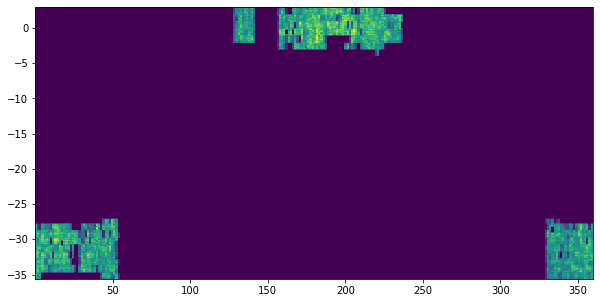

In [3]:
%pylab inline
figure(figsize=[10,5])
hist2d(cat['RAJ2000'], cat['DECJ2000'], 256);

We also have parameters corresponding to the position of the galaxy in the THELI (a data processing pipeline) image. The image plotted here corresponds to a coadd of all the tiles. We notice some vertical (and horizontal ?) lines ; those are most likely due to the gaps between the CCDs in the instrument. 

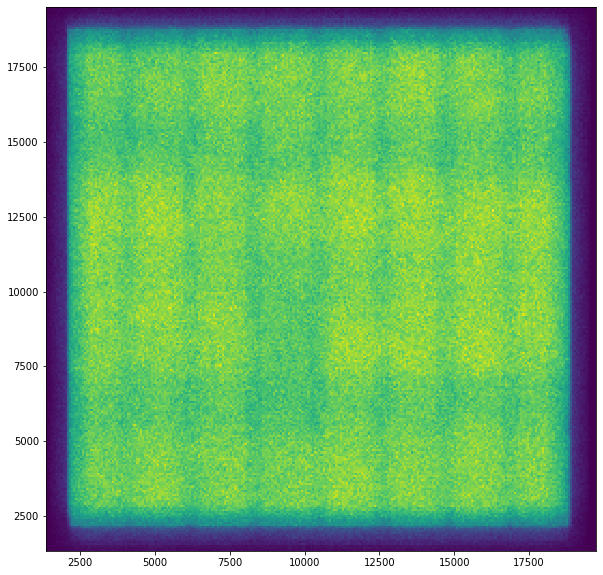

In [ ]:
figure(figsize=[10,10])
hist2d(cat['Xpos'], cat['Ypos'], 256); gca().set_aspect('equal');

Now, we take a look at the redshift distribution. There are 2 different values given for the redshift, both photometric redshifts obtained with the BPZ method. The difference is that Z_B uses a prior while Z_M is only the maximum likelihood.
We can observe a cut at redshift 1.2, probably part of making the "gold" sample.

Text(0.5, 0, 'z')

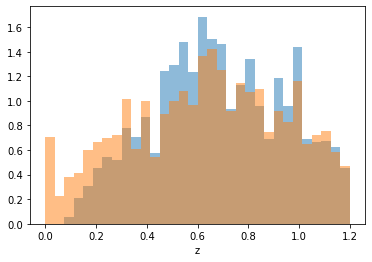

In [ ]:
# Looking at redshift distribution
hist(cat['Z_B'], 32, range=[0, 1.2], density=True,alpha=0.5);
hist(cat['Z_ML'], 32, range=[0, 1.2], density=True,alpha=0.5);
xlabel('z')

We can see in the next plot that the two values agree most of the time, except that sometime the Z_ML values goes toward zero.

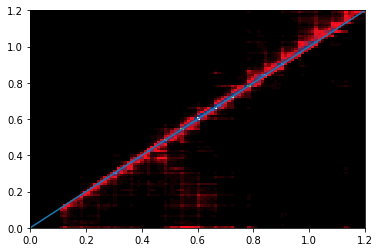

In [ ]:
hist2d(cat['Z_B'], cat['Z_ML'],100, range=[[0,1.2], [0.,1.2]], cmap='gist_stern');
plot([0,1.2],[0,1.2])

Next we want to take a look at the magnitude. We can observe that there have been cuts again, at magnitude 20 and 25.

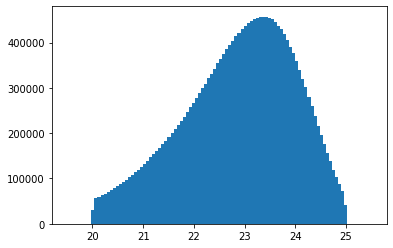

In [ ]:
# Looking at magnitude
hist(cat['MAG_AUTO'], 100, range=[19.5,25.5]);

Again, there are several different magnitudes in the catalog. MAG_AUTO is the one computed by SExtractor which is probably not very good. MAG_GAAP may be more accurate, as the GAAP method corrects for the PSF.

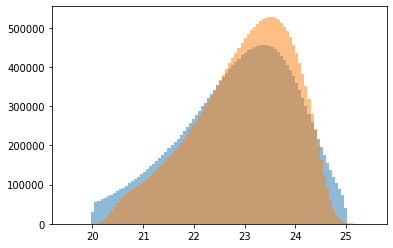

In [ ]:
hist(cat['MAG_AUTO'], 100, range=[19.5,25.5], alpha=0.5);
hist(cat['MAG_GAAP_r'], 100, range=[19.5,25.5], alpha=0.5);

We can again check that the magnitudes agree with each other, which is mostly the case even though the relation is not completely linear.

Text(0, 0.5, 'MAG_GAAP_r')

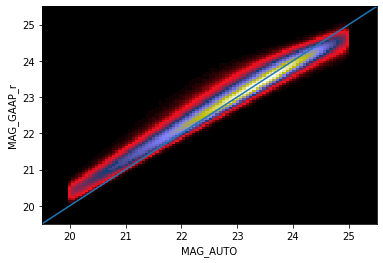

In [ ]:
hist2d(cat['MAG_AUTO'], cat['MAG_GAAP_r'], 100,
       range=[[19.5,25.5], [19.5,25.5]], cmap='gist_stern');
plot([19.5,25.5],[19.5,25.5])
xlabel('MAG_AUTO')
ylabel('MAG_GAAP_r')

Finally (for the first week) we reproduce the figure 1 from this paper https://arxiv.org/pdf/2007.01845.pdf, which is a colour map of the galaxies in our sample. We can see that the "tail" present in the figure from the paper is absent, suggesting that point sources have already been removed from our sample.

Text(0, 0.5, 'J - Ks')

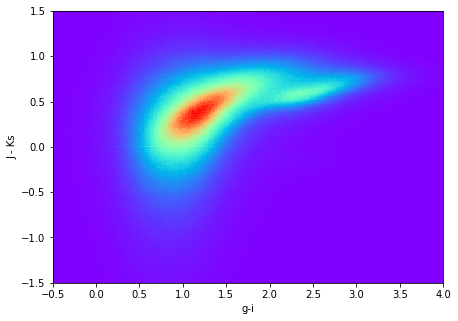

In [ ]:
# Reproducing Fig 1 of Ben's paper
figure(figsize=[7,5])
hist2d(cat['MAG_GAAP_g'] - cat['MAG_GAAP_i'],
       cat['MAG_GAAP_J'] - cat['MAG_GAAP_Ks'],
      256, range=[[-0.5, 4],[-1.5, 1.5]], cmap='rainbow');
xlabel('g-i')
ylabel('J - Ks')

# Week 2
To complete the plot from last week, we remove the extinction (which represents the dimming due to galactic dust), which should result in a bit sharper figure, though it is not really visible here.

Text(0, 0.5, 'J - Ks')

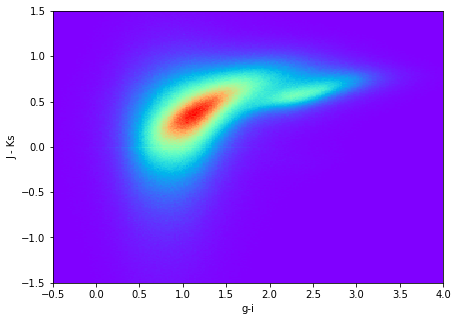

In [7]:
figure(figsize=[7,5])
hist2d(cat['MAG_GAAP_g']-cat['EXTINCTION_g'] - (cat['MAG_GAAP_i']-cat['EXTINCTION_i']),
       cat['MAG_GAAP_J']-cat['EXTINCTION_J'] - (cat['MAG_GAAP_Ks']-cat['EXTINCTION_Ks']),
      256, range=[[-0.5, 4],[-1.5, 1.5]], cmap='rainbow');
xlabel('g-i')
ylabel('J - Ks')

We wanted to identify the "tail" of galaxies on the right ; so we did a magnitude-color plot. Galaxies get redder when g-i increase, so they correspond to red galaxies ; we think that we can identify them as red sequence galaxies, but have not been able to get a definitive answer.

Text(0, 0.5, 'g-i')

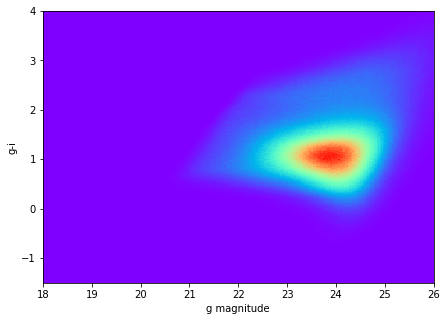

In [6]:
figure(figsize=[7,5])
hist2d(cat['MAG_GAAP_g'],
       cat['MAG_GAAP_g'] - cat['MAG_GAAP_i'],
      256, range=[[18,26],[-1.5, 4]], cmap='rainbow');
xlabel('g magnitude')
ylabel('g-i')

Next we wanted to look again at the possibility of stars being present. We first look at the probabilities that a given object is a galaxy, which is an output of LensFit. We observe a cut at 0.5, which is likely where they decided to make the cut between stars and galaxies.

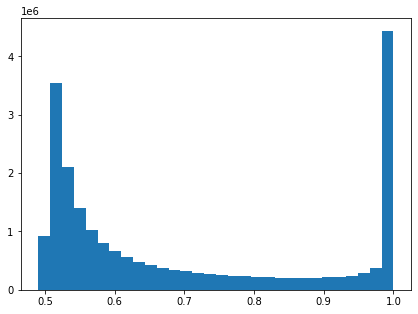

In [45]:
 figure(figsize=[7,5])
 hist(cat['star_galaxy_f_probability'],bins=30) ;

This probability is probably correlated with the radius of the object (large radius means it will be a galaxy), so that is the next plot. We once again observe the cut, and it corresponds to what we expect.

Text(0, 0.5, 'Flux radius')

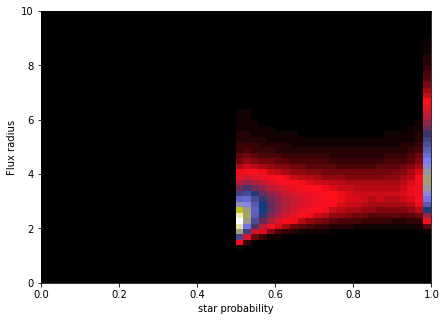

In [35]:
figure(figsize=[7,5])
hist2d(cat['star_galaxy_f_probability'],cat['FLUX_RADIUS'],range=[[0,1],[0,10]],bins=50,cmap="gist_stern") ;
xlabel('star probability')
ylabel('Flux radius')

There is also a probability provided by SExtractor, which this times provides the probability that the object is a star. The cut seems less clear than in the previous plot, leading us to believe that they used the LensFit indicator for the selection.

Text(0, 0.5, 'Flux radius')

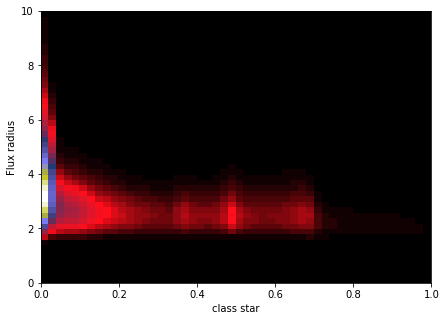

In [13]:
figure(figsize=[7,5])
hist2d(cat['CLASS_STAR'],cat['FLUX_RADIUS'],range=[[0,1],[0,10]],bins=50,cmap="gist_stern") ;
xlabel('class star')
ylabel('Flux radius')

To again confirm that there is no stars, we plotted the radius against the magnitude ; if there are stars, we expect to see an horizontal line at the bottom of the figure (radius ~ 1) ; however there may still be stars in the bottom right of the figure, where the line joins the galaxy pack ; this is because at lower magnitudes small galaxies tend to behave like point sources, making it harder to distinguish stars from galaxies.

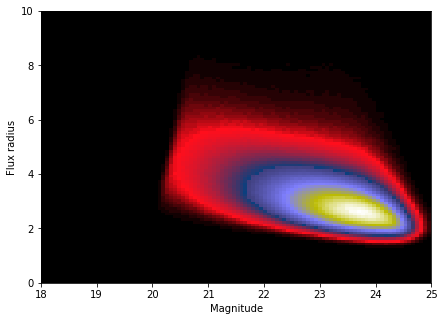

In [19]:
figure(figsize=[7,5])
hist2d(cat['MAG_GAAP_r'],cat['FLUX_RADIUS'],range=[[18,25],[0,10]],bins=100,cmap="gist_stern") ;
xlabel('Magnitude');
ylabel('Flux radius');

We were also intrigued by the sort of diagonal on the left of the distribution. Axel theorized that there might be a cut in SNR, but this does not seem to be the case according to the next plot.

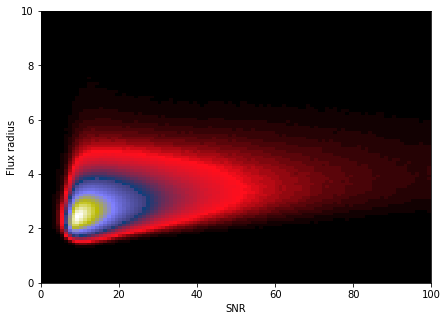

In [21]:
figure(figsize=[7,5])
hist2d(cat['pixel_SNratio'],cat['FLUX_RADIUS'],range=[[0,100],[0,10]],bins=100,cmap="gist_stern") ;
xlabel('SNR');
ylabel('Flux radius');

Lastly we look at the PSF. The distributions of the two ellipticities are not centered on zero and do not match each other, which is to be expected. Note that KiDS is a ground-based survey meaning that the atmospheric PSF is dominant here.

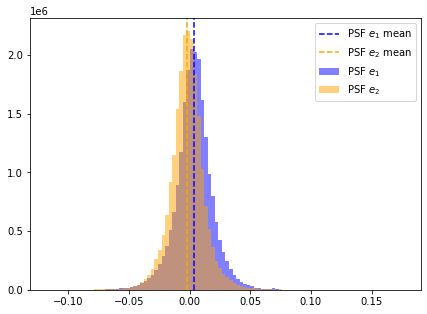

In [43]:
figure(figsize=[7,5])
bins = hist(cat['PSF_e1'],bins=100,alpha=0.5,color="blue",label=r"PSF $e_1$") ;
hist(cat['PSF_e2'],bins=bins[1],alpha=0.5,color="orange",label=r"PSF $e_2$");
axvline(np.mean(cat['PSF_e1']),0,1,linestyle="--",color="blue",label=r"PSF $e_1$ mean");
axvline(np.mean(cat['PSF_e2']),0,1,linestyle="--",color="orange",label=r"PSF $e_2$ mean");
legend();

We also have the PSF ellipticities for each exposure (the regular one is the mean ellipticity). We can see that the variations in PSF ellipticities across the exposure are of the same order of magnitude as the PSF ellipticities themselves (which is again to be expected since the PSF is mostly atmospheric).

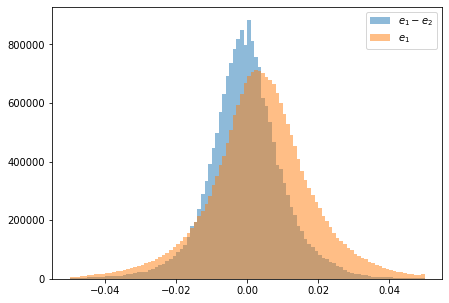

In [44]:
figure(figsize=[7,5])
bins = hist(cat['PSF_e1_exp1']-cat['PSF_e1'],range=[-0.05,0.05],bins=100,alpha=0.5,label=r"$e_1 - e_2$") ;
bins = hist(cat['PSF_e1'],range=[-0.05,0.05],bins=100,alpha=0.5,label=r"$e_1$") ;
legend();

We ran out of time here, but next week we plan to take a look at the PSF size, and if possible try to reproduce figure 11 from the paper, showing the shear around BOSS galaxies.